# 1. A cybersecurity firm implements a new intrusion detection system (IDS) designed to reduce the average response time to detect and mitigate cyberattacks. Historically, the average response time with the old system was 15 minutes. After deploying the new IDS, the firm collects a sample of 50 incident response times.

- Formulate the null hypothesis (H₀) and the alternative hypothesis (Hₐ) to test whether the new IDS reduces the average response time.

- Once you have your hypotheses, propose a statistical test you would use to compare response times and explain why it is appropriate for this scenario.  Research one tail and two tailed tests and identify which is appropriate.

Null Hypothesis (H0): New design does not decrease avreage time.

Alternative Hypothesis (H1): New design decrease average time.

We will be using the t-test.
A two-tailed test is a statistical method used when the direction of the effect is not specified in the hypothesis; unlike a one-tailed test that looks for a significant effect in one specific direction, a two-tailed test checks for significance in both directions.

In our case, the direction has been given as a decrease in average time therefore we will be using a one tailed test.

After calculating the p-value, we compare it to the our significant level (alpha) which is 0.05

If p-value < 0.05, reject the null hypothesis.

Else, failed to reject the null hypothesis.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy.stats import skew, kurtosis
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
from scipy.interpolate import griddata
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.spatial.distance import euclidean, minkowski, cityblock
import math
import networkx
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 2. Creating a 2x2 grid of subplots.  Graph the following using the heart.csv database.
- Histogram of chol
- Box plot or trtbps based on sex
- Scatterplot comparing trtbps and chol
- Simple bar chart of count out – which represents heart disease (1-yes 0-no).

<ipython-input-16-5726e0e1c81e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1, 0], x='sex', y='trtbps', data=data, palette='Set2')
<ipython-input-16-5726e0e1c81e>:19: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(ax=axes[0, 1], x='trtbps', y='chol', data=data, palette='tab20')


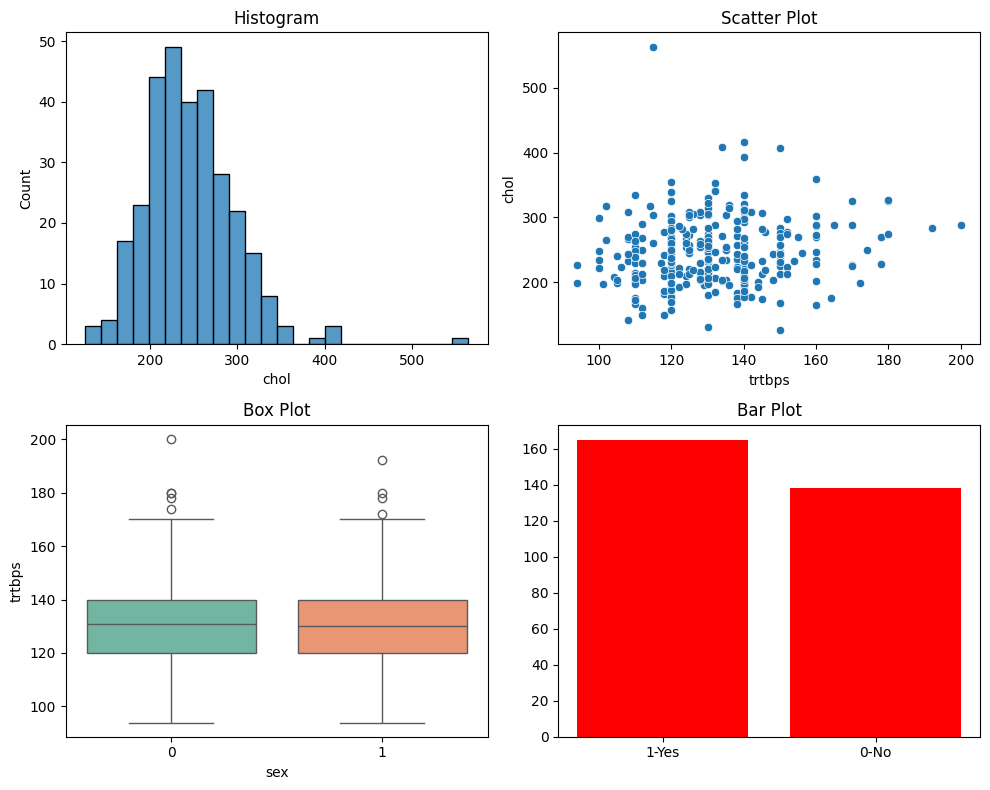

In [16]:
# Load data
data = pd.read_csv("sample_data/heart.csv")

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Histogram
#axes[0, 0].hist(data['chol'], bins=10)
sns.histplot(ax=axes[0, 0], data=data.chol)
axes[0, 0].set_title('Histogram')

# Box plot
#axes[1, 0].boxplot(data["sex"], data["trtbps"])
sns.boxplot(ax=axes[1, 0], x='sex', y='trtbps', data=data, palette='Set2')
axes[1, 0].set_title('Box Plot')

# Scatter plot
#axes[0, 1].scatter(data['trtbps'], data['chol'])
sns.scatterplot(ax=axes[0, 1], x='trtbps', y='chol', data=data, palette='tab20')
axes[0, 1].set_title('Scatter Plot')

# Bar plot (just an example)
axes[1, 1].bar(['1-Yes', '0-No'], data['output'].value_counts(), color='red')
#sns.barplot(ax=axes[1, 1], data=data.output.value_counts())
axes[1, 1].set_title('Bar Plot')

plt.tight_layout()
plt.show()

## 3. Using matplotlib and the sample code provided from class.  Generate a 3d scatter plot with:
- x = trtbps
- y = chol
- z = thalachh
- color/shade the points to represent df[‘age’]
- Add title, legend and axis labels.

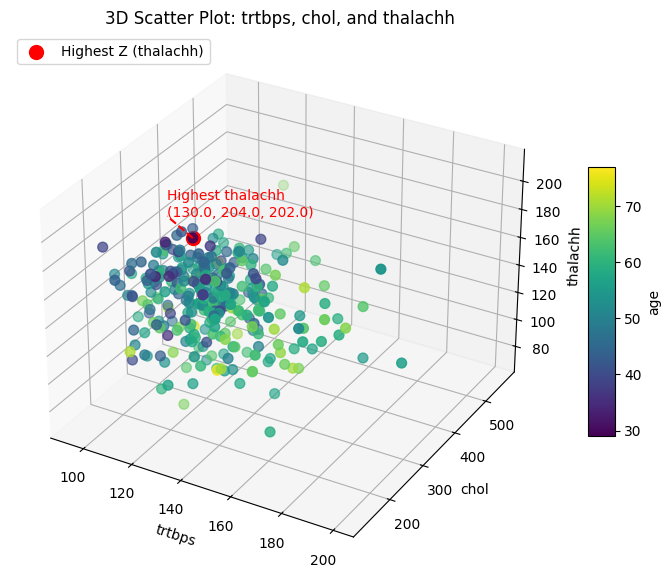

In [17]:
# Select the variables
x = data['trtbps']
y = data['chol']
z = data['thalachh']

# Identify the point with the highest z (displacement)
max_z_index = z.idxmax()
max_x = x[max_z_index]
max_y = y[max_z_index]
max_z = z[max_z_index]

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(x, y, z, c=data['age'], cmap='viridis', s=50)

# Set labels
ax.set_xlabel('trtbps')
ax.set_ylabel('chol')
ax.set_zlabel('thalachh')
ax.set_title('3D Scatter Plot: trtbps, chol, and thalachh')

# Add a color bar
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('age')

# Annotate the highest point
annotation_offset = [-10, 0, 10]  # Offset for the annotation
line_end = [max_x + annotation_offset[0], max_y + annotation_offset[1], max_z + annotation_offset[2]]

# Draw a line from the point to the annotation
ax.plot([max_x, line_end[0]], [max_y, line_end[1]], [max_z, line_end[2]],
        color='red', linestyle='dashed', zorder=10)

# Add annotation text
ax.text(line_end[0], line_end[1], line_end[2],
        f'Highest thalachh\n({max_x:.1f}, {max_y:.1f}, {max_z:.1f})',
        color='red', fontsize=10, zorder=11)

# Highlight the highest point with a larger marker
ax.scatter(max_x, max_y, max_z, color='red', s=100, label='Highest Z (thalachh)', zorder=12)

# Show legend
ax.legend(loc='upper left', frameon=True)

# Show the plot
plt.show()

## 4. Use a statistical test in python to determine if data for chol is normally distributed.  What is the p-value and t-statistic.  In your own words, explain the null and alternative hypothesis and how these values are interpreted.

In [18]:
# A function to test if chol column has a normal distribution
def shapiro_test(data):
    stat, p_value = shapiro(data)

    print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}")

    if p_value > 0.05:
        print("Fail to reject the null hypothesis: Data follows a normal distribution")
    else:
        print("Reject the null hypothesis: Data does not follow a normal distribution")

In [19]:
'''
Null Hypothesis (H0): The data is normally distributed.
Alternative Hypothesis (H1): The data is not normally distributed.

The null hypothesis states that the data is normally distributed thus the data has a bell shape, while the alternative hypothesis states that the data is not normally distributed.


If p-value > 0.05, fail to reject the null hypothesis.
The data is normally distributed.
If p-value <= 0.05, reject the null hypothesis.
The data is not normally distributed.

In our case, the p-value which is 5.364847008526812e-09 is less than 0.05. Therefore, we reject the null hypothesis and conclude that the data is not normally distributed.
'''
shapiro_test(data.chol)



Shapiro-Wilk Test Statistic: 0.9468815274790511, p-value: 5.364847008526812e-09
Reject the null hypothesis: Data does not follow a normal distribution


## 5. Create a function that returns the standard deviation of some data.  Do not use any built-in library to compute.  Add error checking through try and except blocks of code as appropriate.  Test your function with features from the heart dataset.  Assume the data is a sample of the population.  Check your results against a built-in library to confirm your function works.

In [20]:
# Create a function to calculate standard deviation
def stdev(lst_item):
  try:
    n = len(lst_item)
    mean = sum(lst_item)/n
    # Calculate the sum of squared deviations
    sum_sq_dev = sum((x - mean) ** 2 for x in lst_item)
    # Calculate the variance
    variance = sum_sq_dev / (n - 1)  # Using Bessel's correction
    # Calculate the standard deviation
    std_dev = variance ** 0.5
  except TypeError:
    return "Invalid input: reqiures integer or float"
  return print(f'Standard deviation: {std_dev}')


In [21]:
# call the standard deviation function
stdev(data.sex)

# Testing an in-built function
print(f'Standard deviation: {data.sex.std()}')

Standard deviation: 0.4660108233396251
Standard deviation: 0.4660108233396251


## 6. Create two sets with this code:

import random
random_setA = {random.randint(1, 100) for _ in range(25)}
random_setB = {random.randint(1, 100) for _ in range(25)}

Find and display the union, intersect, and symmetric difference.

Use the in method to see if the value 72 is in random_setA

In [22]:
import random
random_setA = {random.randint(1, 100) for _ in range(25)}
random_setB = {random.randint(1, 100) for _ in range(25)}

In [23]:
# Intersection
intersection = random_setA.intersection(random_setB)
print(f'Intersection: {intersection}')

# Union
union = random_setA.union(random_setB)
print(f'Union: {union}')

# Symmetric Difference
symmetric_difference = random_setA.symmetric_difference(random_setB)
print(f'Symmetric Difference: {symmetric_difference}')

Intersection: {75}
Union: {1, 2, 8, 10, 12, 16, 17, 20, 21, 23, 25, 27, 28, 29, 30, 35, 37, 39, 48, 53, 55, 61, 62, 63, 65, 70, 71, 72, 73, 75, 77, 78, 79, 81, 82, 85, 98, 99}
Symmetric Difference: {1, 2, 8, 10, 12, 16, 17, 20, 21, 23, 25, 27, 28, 29, 30, 35, 37, 39, 48, 53, 55, 61, 62, 63, 65, 70, 71, 72, 73, 77, 78, 79, 81, 82, 85, 98, 99}


In [24]:
# method to see if the value 72 is in random_setA
if 72 in random_setA:
    print("72 is in random_setA")
else:
    print("72 is not in random_setA")

72 is in random_setA


## 7. Find the jaccard distance between the following sets.

set1 = {"apple", "banana", "cherry", "date", "fig"}
set2 = {"banana", "cherry", "grape", "kiwi", "melon"}

Note: You can use scipy, but only load the method you need.  Using sets directly will not work for some scipy methods, you may need to convert a set to some other structure, try casting it

In [25]:
# Example sets of words (e.g., two documents)
set1 = {"apple", "banana", "cherry", "date", "fig"}
set2 = {"banana", "cherry", "grape", "kiwi", "melon"}

# Jaccard Index
intersection = set1.intersection(set2)
union = set1.union(set2)
jaccard_index = len(intersection) / len(union)

# Jaccard Distance
jaccard_distance = 1 - jaccard_index
print("Jaccard distance:", jaccard_distance)

Jaccard distance: 0.75


# 8.Simplify the following using De Morgan’s laws (enter your response as text in a markdown cell).

((A  ∩  B) ∪ C)c

Hint: step 1 for a similar problem:  ((A  ∩  B) ∩ C)c  => (A  ∩  B)c ∪ Cc

- De Morgan's law sates that (A U B)^c = A^c ∩ B^c and (A ∩ B)^c = A^c U B^c.
- The first expression to work on is ((A ∩ B) ∪ C)^c
- Therefore (A ∩ B)^c ∩ C^c
- Next (A ∩ B)^c which is A^c U B^c
- Hence, A^c U B^c ∩ C^c or (A^c U B^c) ∩ C^c